# Examples for Assignment05

This notebook was used in lab to demonstrate how the Laplace approximation and inverse-CDF sampling code used in A05 should work. This notebook won't work for you until you write your own code. You needn't use this notebook (and should not include a copy of it with your solutions), but it may help you as you work on the assignment.

## Imports

In [1]:
# PyData imports:
import numpy as np
import scipy
import matplotlib as mpl
from matplotlib.pyplot import *
from numpy import *
from scipy import stats

In [2]:
# Imports from the module with UnivariateBayesianInference subclasses:
from poisson_binomial_cauchy import PoissonRateInference, BinomialInference, \
    CauchyLocationInference

## Laplace approximation for marginal likelihood & posterior mean

We'll demonstrate using the Laplace approximation to compute the marginal likelihood and the posterior mean for some univariate example problems.

Start by defining the factor multiplying the posterior in the integral defining the posterior mean (this factor was denoted $g(\theta)$ in the lecture; note that $g(\theta) = 1$ for the marginal likelihood calculation).

In [3]:
def g_mean(params):
    """
    Return the function whose expectation gives the posterior mean, i.e.,
    just return the values of the params.
    """
    params = asarray(params)
    return params

In [4]:
# This flag is to make some upcoming code optional,
# running only if some of the work in the assignment
# has been completed.  Set it to False if you want to
# run the notebook before you have coded the Laplace
# approximation.

have_laplace = True

### A Poisson case

Start by using a `PoissonRateInference` instance to plot the posterior for a Poisson rate parameter inference case.  Note that the assignment asks you to make a somewhat different plot, including a curve generated from Laplace approximation results.

Text(0.5, 1.0, 'Poisson case')

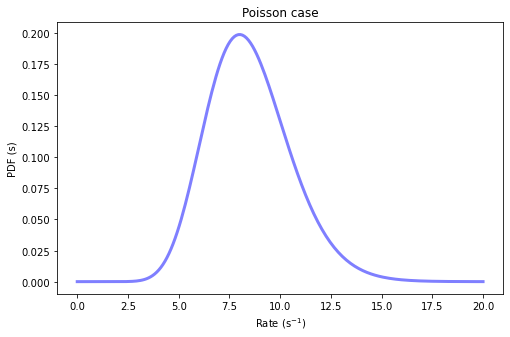

In [5]:
# 1st case:  Poisson, const prior, (n,T) = (16, 2)

r_u = 20.  # upper limit for PDF calculation and plotting

# Create a PRI instance and plot the PDF.
prior_l, prior_u = 0., 1e5
flat_pdf = 1./(prior_u - prior_l)
n, T = 16, 2
pri = PoissonRateInference(T, n, flat_pdf, r_u)

figure(figsize=(8,5))
pri.plot(alpha=.5)

xlabel(r'Rate (s$^{-1}$)')
ylabel('PDF (s)')
title('Poisson case')

If the `laplace` method code has been written, use it to compute estimates of both the marginal likelihood and the posterior mean (we need the former to estimate the latter; make sure you understand why!).  Print the results with appropriate precision.  In your solutions, you are free to craft your own print statements (perhaps producing nicer output than shown here).

In [6]:
if have_laplace:
    # Laplace approx for the marg. like. and the mean:
    ampl, locn, sig, ml = pri.laplace()
    laplace_mean = pri.laplace(g_mean)
    post_mean_l = laplace_mean[3]/ml

    # Print using string formatting:
    print('Poisson case:')
    print('Marg. like.: {:.4e} (quad), {:.4e} (Laplace)'.format(pri.mlike, ml))
    print('Posterior mean: {:4.2f} (quad), {:4.2f} (Laplace)'.format(pri.post_mean, post_mean_l))

Poisson case:
Marg. like.: 1.0461e+08 (quad), 1.0407e+08 (Laplace)
Posterior mean: 8.50 (quad), 8.38 (Laplace)


### A binomial case

Text(0.5, 1.0, 'Binomial case')

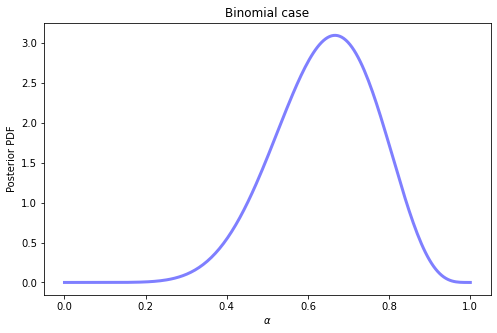

In [7]:
# 2nd case:  Binomial, const prior, (n, n_trials) = (8, 12)

# Define the data.
n, n_trials = 8, 12

bi = BinomialInference(n, n_trials)

figure(figsize=(8,5))
bi.plot(alpha=.5)

xlabel(r'$\alpha$')
ylabel('Posterior PDF')
title('Binomial case')

In [8]:
if have_laplace:
    # Laplace approx for the marg. like. and the mean:
    laplace_ml = bi.laplace()
    laplace_mean = bi.laplace(g_mean)
    post_mean_l = laplace_mean[3]/laplace_ml[3]

    # Print using string formatting:
    print('Binomial case:')
    print('Marg. like.: {:10.4e} (quad), {:10.4e} (Laplace)'.format(bi.mlike, laplace_ml[3]))
    print('Posterior mean: {:4.2f} (quad), {:4.2f} (Laplace)'.format(bi.post_mean, post_mean_l))

Binomial case:
Marg. like.: 1.5540e-04 (quad), 1.6432e-04 (Laplace)
Posterior mean: 0.64 (quad), 0.69 (Laplace)


## Posterior sampling for Cauchy using the inverse-CDF method

To demonstrate posterior sampling with the inverse-CDF algorithm, we'll plot a posterior PDF for a Cauchy location parameter estimation case, and then plot a histogram of 10k posterior samples from that posterior, generated via inverse-CDF.  Finally, we'll print results from using the Laplace approximation for this Cauchy case.

Cauchy case:
Marg. like.: 1.6989e-05 (quad), 1.5136e-05 (Laplace)
Posterior mean: 4.97 (quad), 5.34 (Laplace)


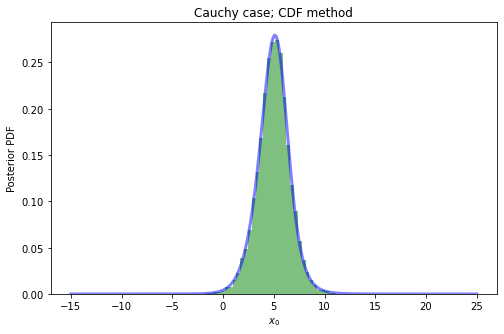

In [9]:
# A Cauchy location parameter estimation example,
# using a flat (uniform) prior.

x0, d = 5., 3.
data = stats.cauchy(x0, d).rvs(5)
flat_pdf = .001  # e.g., for prior range 1e3

cli = CauchyLocationInference(d, data, flat_pdf, (-15., 25.))

figure(figsize=(8,5))
cli.plot(alpha=.5)
# xlim(-10, 15.)

xlabel('$x_0$')
ylabel('Posterior PDF')
title('Cauchy case; CDF method')

samps = []
for i in range(10000):
    samps.append(cli.samp_cdf())
samps = array(samps)

bins = hist(samps, 50, density=True, color='g', alpha=.5)

if have_laplace:
    # Laplace approx for the marg. like. and the mean:
    ampl, locn, sig, ml = cli.laplace()
    laplace_mean = cli.laplace(g_mean)
    post_mean_l = laplace_mean[3]/ml

    # Use results to plot a Gaussian PDF here.

    # Print using string formatting:
    print('Cauchy case:')
    print('Marg. like.: {:.4e} (quad), {:.4e} (Laplace)'.format(cli.mlike, ml))
    print('Posterior mean: {:4.2f} (quad), {:4.2f} (Laplace)'.format(cli.post_mean,
                                                                     post_mean_l))

With just 5 data points, the Cauchy location parameter posterior PDF is often skew and heavy-tailed, which can make the Laplace approximation less accurate than for the other examples shown above. Try rerunning the Cauchy case cell (using Ctrl-Return) to see how well (or poorly!) the Laplace approximation works, depending on the shape of the posterior.